# Repressilator
See https://journals.plos.org/ploscompbiol/article/file?id=10.1371/journal.pcbi.1002888&type=printable

![repressilator](../pics/repressilator.png)
$
\left\{
\begin{array}{l}
\dot{m_1} = -m_1 + \frac{\alpha}{1+p_3^h}+\alpha_0
\\
\dot{m_2} = -m_2 + \frac{\alpha}{1+p_1^h}+\alpha_0
\\
\dot{m_3} = -m_3 + \frac{\alpha}{1+p_2^h}+\alpha_0
\\
\dot{p_i} = \beta(m_i-p_i)\quad \text{ for } i=1,2,3
\end{array}
\right.
$

In [1]:
# this makes sure it starts looking for things from the top folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\ode_to_odes


In [2]:
from ode_helpers import *

In [3]:
def f(t, y, c):
    ydot = [-y[0] + c[0]/(1+y[2]**c[1]) + c[2],
            -y[1] + c[0]/(1+y[0]**c[1]) + c[2],
            -y[2] + c[0]/(1+y[1]**c[1]) + c[2],
            c[3]*(y[0]-y[3]),
            c[3]*(y[1]-y[4]),
            c[3]*(y[2]-y[5])
           ]
    return ydot

alpha= 5
h= 5
alpha0 = 0
beta= 1
c = (alpha, h, alpha0, beta)

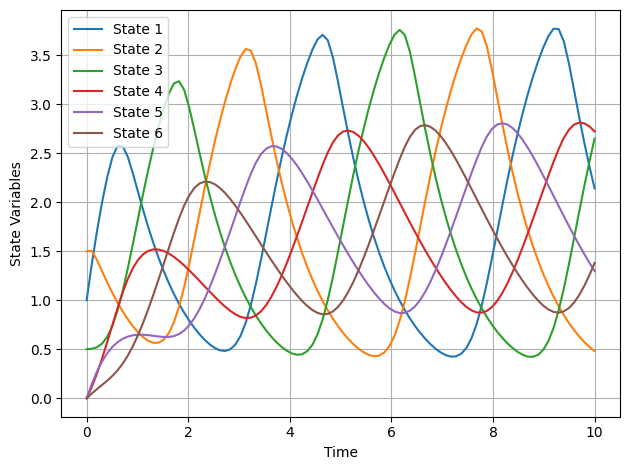

In [4]:
tspan = np.linspace(0, 10, 100)
yinit = [1, 1.5, .5, 0, 0, 0]
sol = solve_ivp(lambda t,
                y: f(t, y, c),
                [tspan[0], tspan[-1]],
                yinit,
                t_eval=tspan,
                rtol = 1e-5)
state_plotter(sol.t, sol.y)